# Bi-module project: What makes people happy?

Congratulations for making it this far in the course! You absolutely rock and should be very proud of yourself! :)
In this project, you will put into practice everything you've learned in the past modules and go through the whole process of data analysis.

The data you will work for this project comes from the `World Happiness Report`. The `World Happiness Report` is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. Over the last years, `World Happiness Report` focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.

![image.png](https://storage.googleapis.com/kaggle-datasets-images/2079145/3452209/9d687733ce362ba992e005f3484eb38b/dataset-cover.jpg?t=2023-06-16-20-42-30)

**Dataset information**
>dataset: `Dataset-Happiness_Score.csv`

The information in the datasets is based on the answers of survey participants who were asked to evaluate how satisfied they are with their current lives on a scale from 0 to 10 (the most excellent conceivable life being 10 and the most exceedingly bad conceivable life being 0).

The Happiness Score is explained by the following factors:

- `Overall rank`: Rank of a country on the happiness scale when compared to other countries
- `Country or region`
- `Score`:  National average of the responses to the main life happiness evaluation question asked in the survey. The range is [0-10]
- `GDP per capita`: Measure of the standard of living, prosperity, and overall well-being in a country; the higher, the better.
- `Healthy Life Expectancy`: The score range is [0-1]. The higher this value, the more confidence people have in terms of healthy life expectancy
- `Social support`: It indicates how much people appreciate the social support from their governments. Ranges from [0-2]; the higher this value, the more appreciation they have.
- `Freedom to make life choices`: Ranges from 0 to 1. The higher this value, the more free people feel
- `Generosity`: Ranges from 0 to 1. The higher this value, the more generous people feel
- `Perceptions of corruption`: Perception of corruption in a country; ranges from 0 to 1. The higher this value, the lower the perception of corruption
- `year`: the year the data was collected  

**Project Objective**

Tell a story with your dataset, and to try to answer the following question:

>`Which factors are more/the most important to live a happier life?`

The results of your analysis could help people and their countries/governments to focus their resources and investments on the more significant factors to achieve a higher level of happiness.

**Project Pointers**
You are expected to:
- Conduct data cleaning (deal with duplicates, missing data, incorrect/inconsistent formatting, outliers, etc.)
- Conduct univariate analysis
- Conduct bivariate analysis
- Write out a conclusion based on your analysis that answers the project question and, ideally, makes recommendations about what actions people/countries can take.

# Part 1: Import the libraries

## First part: Import your fav libraries

In [1]:
# Import the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tabulate # Pretty print tabular data

from IPython.display import display
%matplotlib inline
import plotly.offline as py
import statsmodels.api as sm
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
from plotly.subplots import make_subplots
py.init_notebook_mode(connected=True)
import plotly.io as pio
from sklearn.ensemble import IsolationForest # Machine Learning model for anomaly detection

pio.renderers.default = 'vscode' # THIS# 
# pio.renderers.default = 'notebook'


import warnings
warnings.filterwarnings('ignore')

# Part 2: Prepare the Data

## Import your dataset

In [4]:
# Import the datasets #"../datasets/M1-M2_2.0.2._Iris.csv"
data = pd.read_csv('../EDA_Happiness_Project/Dataset-Happiness_Score.csv')
data_raw = data.copy() # Keep a copy of the original data


In [5]:
# Read the dataset
data.info()
# We have some missing values in the dataset
# In the columns "Healthy life expenctancy" we have more than 50% of NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0.1                  312 non-null    int64  
 1   Unnamed: 0                    312 non-null    int64  
 2   Overall rank                  312 non-null    int64  
 3   Country or region             312 non-null    object 
 4   Score                         312 non-null    float64
 5   GDP per capita                312 non-null    float64
 6   Social support                312 non-null    float64
 7   Healthy life expectancy       7 non-null      float64
 8   Freedom to make life choices  312 non-null    float64
 9   Generosity                    312 non-null    float64
 10  Perceptions of corruption     311 non-null    float64
 11  year                          312 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 29.4+ KB


## Check the types of variables

In [6]:
# Check the types of the columns
data.dtypes
# We have only one categorical column "Country" and the rest are numerical columns


Unnamed: 0.1                      int64
Unnamed: 0                        int64
Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
year                              int64
dtype: object

In [7]:
# We have categorical and numerical columns
# Check the number of unique values in each column
data.nunique()

Unnamed: 0.1                    312
Unnamed: 0                      156
Overall rank                    156
Country or region               160
Score                           295
GDP per capita                  276
Social support                  266
Healthy life expectancy           6
Freedom to make life choices    236
Generosity                      198
Perceptions of corruption       174
year                              2
dtype: int64

In [8]:
print(data['Country or region'].unique())
# Check the countries in the dataset

['Finland' 'Norway' 'Denmark' 'Iceland' 'Switzerland' 'Netherlands'
 'Canada' 'New Zealand' 'Sweden' 'Australia' 'United Kingdom' 'Austria'
 'Costa Rica' 'Ireland' 'Germany' 'Belgium' 'Luxembourg' 'United States'
 'Israel' 'United Arab Emirates' 'Czech Republic' 'Malta' 'France'
 'Mexico' 'Chile' 'Taiwan' 'Panama' 'Brazil' 'Argentina' 'Guatemala'
 'Uruguay' 'Qatar' 'Saudi Arabia' 'Singapore' 'Malaysia' 'Spain'
 'Colombia' 'Trinidad & Tobago' 'Slovakia' 'El Salvador' 'Nicaragua'
 'Poland' 'Bahrain' 'Uzbekistan' 'Kuwait' 'Thailand' 'Italy' 'Ecuador'
 'Belize' 'Lithuania' 'Slovenia' 'Romania' 'Latvia' 'Japan' 'Mauritius'
 'Jamaica' 'South Korea' 'Northern Cyprus' 'Russia' 'Kazakhstan' 'Cyprus'
 'Bolivia' 'Estonia' 'Paraguay' 'Peru' 'Kosovo' 'Moldova' 'Turkmenistan'
 'Hungary' 'Libya' 'Philippines' 'Honduras' 'Belarus' 'Turkey' 'Pakistan'
 'Hong Kong' 'Portugal' 'Serbia' 'Greece' 'Lebanon' 'Montenegro' 'Croatia'
 'Dominican Republic' 'Algeria' 'Morocco' 'China' 'Azerbaijan'
 'Tajikistan' '

In [9]:
# Check the head of the dataset
data.head(20)


Unnamed: 0.1  Unnamed: 0  Overall rank     Country or region  Score  \
0              0           0             1               Finland  7.632   
1              1           1             2                Norway  7.594   
2              2           2             3               Denmark  7.555   
3              3           3             4               Iceland  7.495   
4              4           4             5           Switzerland  7.487   
5              5           5             6           Netherlands  7.441   
6              6           6             7                Canada  7.328   
7              7           7             8           New Zealand  7.324   
8              8           8             9                Sweden  7.314   
9              9           9            10             Australia  7.272   
10            10          10            11        United Kingdom  7.190   
11            11          11            12               Austria  7.139   
12            12          12            13            Costa Rica  7.072   
13            13          13            14               Ireland  6.977   
14            14          14            15               Germany  6.965   
15            15          15            16               Belgium  6.927   
16            16          16            17            Luxembourg  6.910   
17            17          17            18         United States  6.886   
18            18          18            19                Israel  6.814   
19            19          19            20  United Arab Emirates  6.774   

    GDP per capita  Social support  Healthy life expectancy  \
0            1.305           1.592                      NaN   
1            1.456           1.582                      NaN   
2            1.351           1.590                      NaN   
3            1.343           1.644                      NaN   
4            1.420           1.549                      NaN   
5            1.361           1.488                      NaN   
6            1.330           1.532                      NaN   
7            1.268           1.601                      NaN   
8            1.355           1.501                      NaN   
9            1.340           1.573                      NaN   
10           1.244           1.433                      NaN   
11           1.341           1.504                      NaN   
12           1.010           1.459                      NaN   
13           1.448           1.583                      NaN   
14           1.340           1.474                      NaN   
15           1.324           1.483                      NaN   
16           1.576           1.520                      NaN   
17           1.398           1.471                      NaN   
18           1.301           1.559                      NaN   
19           2.096           0.776                      NaN   

    Freedom to make life choices  Generosity  Perceptions of corruption  year  
0                          0.681       0.202                      0.393  2018  
1                          0.686       0.286                      0.340  2018  
2                          0.683       0.284                      0.408  2018  
3                          0.677       0.353                      0.138  2018  
4                          0.660       0.256                      0.357  2018  
5                          0.638       0.333                      0.295  2018  
6                          0.653       0.321                      0.291  2018  
7                          0.669       0.365                      0.389  2018  
8                          0.659       0.285                      0.383  2018  
9                          0.647       0.361                      0.302  2018  
10                         0.464       0.262                      0.082  2018  
11                         0.617       0.242                      0.224  2018  
12                         0.632       0.143                    

In [10]:
# Check the unhappiness countries using tail()
data.tail(20)

Unnamed: 0.1  Unnamed: 0  Overall rank         Country or region  Score  \
292           292         136           137                     Egypt  4.166   
293           293         137           138                    Zambia  4.107   
294           294         138           139                      Togo  4.085   
295           295         139           140                     India  4.015   
296           296         140           141                   Liberia  3.975   
297           297         141           142                   Comoros  3.973   
298           298         142           143                Madagascar  3.933   
299           299         143           144                   Lesotho  3.802   
300           300         144           145                   Burundi  3.775   
301           301         145           146                  Zimbabwe  3.663   
302           302         146           147                     Haiti  3.597   
303           303         147           148                  Botswana  3.488   
304           304         148           149                     Syria  3.462   
305           305         149           150                    Malawi  3.410   
306           306         150           151                     Yemen  3.380   
307           307         151           152                    Rwanda  3.334   
308           308         152           153                  Tanzania  3.231   
309           309         153           154               Afghanistan  3.203   
310           310         154           155  Central African Republic  3.083   
311           311         155           156               South Sudan  2.853   

     GDP per capita  Social support  Healthy life expectancy  \
292           0.913           1.039                      NaN   
293           0.578           1.058                      NaN   
294           0.275           0.572                      NaN   
295           0.755           0.765                      NaN   
296           0.073           0.922                      NaN   
297           0.274           0.757                      NaN   
298           0.274           0.916                      NaN   
299           0.489           1.169                      NaN   
300           0.046           0.447                      NaN   
301           0.366           1.114                      NaN   
302           0.323           0.688                      NaN   
303           1.041           1.145                      NaN   
304           0.619           0.378                      NaN   
305           0.191           0.560                      NaN   
306           0.287           1.163                      NaN   
307           0.359           0.711                      NaN   
308           0.476           0.885                      NaN   
309           0.350           0.517                      NaN   
310           0.026           0.000                      NaN   
311           0.306           0.575                      NaN   

     Freedom to make life choices  Generosity  Perceptions of corruption  year  
292                         0.241       0.076                      0.067  2019  
293                         0.431       0.247                      0.087  2019  
294                         0.293       0.177                      0.085  2019  
295                         0.498       0.200                      0.085  2019  
296                         0.370       0.233                      0.033  2019  
297                         0.142       0.275                      0.078  2019  
298                         0.148       0.169                      0.041  2019  
299                         0.359       0.107                      0.093  2019  
300                         0.220       0.176                      0.180  2019  
301                         0.361       0.151                      0.089  2019  
302                         0.026       0.419                      0.110  2019  
303    

# Part 3: EDA ~ Exploratory Data Analysis

![](https://i0.wp.com/timoelliott.com/blog/wp-content/uploads/2015/01/torturing-the-data3.jpg?resize=608%2C456&ssl=1)

## Step 1: Meet your data and check for null values

In [11]:
# Check the shape of the dataset
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset has 312 rows and 12 columns.


In [12]:
# Meet your dataset with EDA
data.describe().T.style.background_gradient(cmap='Blues', low=0, high=1, axis=None).set_properties(**{'font-size': '12pt'})
# T.style() is used to apply styles to the DataFrame

### Check for Missing values

`data.isnull().sum()`



| % Missing values | Take action | Watch out!	        
| :- |:-| :-
|< threshold|`data.dropna()`|	Check the final number of rows that you get
|> threshold|`data.fillna()`|- Categorical: ` data.variable.mode() [0]`<br><br> - Numerical: `data.variable.mean()`
|> 50-60%|	`data.drop()`|Check the final number of rows that you get

In [13]:
# check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Healthy life expectancy      305
Perceptions of corruption      1
dtype: int64


In [14]:
# Check the percentage of missing values
missing_values_percentage = (data.isnull().sum() / data.shape[0]) * 100
print(missing_values_percentage[missing_values_percentage > 0])

Healthy life expectancy      97.756410
Perceptions of corruption     0.320513
dtype: float64


### Importing Functions for EDA and filling the NaN values

In [15]:
# Importing the Functions for EDA will help you. 
import sys
sys.path.append('/Users/ivanacaridad/AllWomen/_DA_course/_functions_')

from Functions_EDA import *

In [16]:
help(percentage_nullValues)

Help on function percentage_nullValues in module Functions_EDA:

percentage_nullValues(data)
    Function that calculates the percentage of missing values in every column of your dataset
    input: data --> dataframe



In [17]:
percentage_nullValues(data)
# So we got 98% of missing values in the column "Happiness Score" and less than 1% in the column "Standard Error".
# So we can drop the column "Happiness Score" because the threshold is >60% of missing values.

Percentage_NaN
Healthy life expectancy                 97.8
Perceptions of corruption                0.3
Unnamed: 0.1                             0.0
Unnamed: 0                               0.0
Overall rank                             0.0
Country or region                        0.0
Score                                    0.0
GDP per capita                           0.0
Social support                           0.0
Freedom to make life choices             0.0
Generosity                               0.0
year                                     0.0

## Step 2: Drop the columns >30% threshold

In [18]:
# help(select_threshold) is a function that helps to select the threshold for missing values.
help(select_threshold)

Help on function select_threshold in module Functions_EDA:

select_threshold(data, thr)
    Function that  calculates the percentage of missing values in every column of your dataset
    input: data --> dataframe



In [19]:
# Here we are already dropping the column "Happiness Score" because the threshold is >30% of missing values.
# The new dataset will be saved in the variable data_f.
data_f = select_threshold(data, 30)
data.columns
data_f.columns
data_f.head(5)

Columns to keep: 11
Those columns have a percentage of NaN less than 30 :
['Perceptions of corruption', 'Unnamed: 0.1', 'Unnamed: 0', 'Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Freedom to make life choices', 'Generosity', 'year']


Perceptions of corruption  Unnamed: 0.1  Unnamed: 0  Overall rank  \
0                      0.393             0           0             1   
1                      0.340             1           1             2   
2                      0.408             2           2             3   
3                      0.138             3           3             4   
4                      0.357             4           4             5   

  Country or region  Score  GDP per capita  Social support  \
0           Finland  7.632           1.305           1.592   
1            Norway  7.594           1.456           1.582   
2           Denmark  7.555           1.351           1.590   
3           Iceland  7.495           1.343           1.644   
4       Switzerland  7.487           1.420           1.549   

   Freedom to make life choices  Generosity  year  
0                         0.681       0.202  2018  
1                         0.686       0.286  2018  
2                         0.683       0.284  2018  
3                         0.677       0.353  2018  
4                         0.660       0.256  2018

In [20]:
# Check the null values in the new dataset
data_f.isnull().sum()
# percentage_nullValues(data_f)

Perceptions of corruption       1
Unnamed: 0.1                    0
Unnamed: 0                      0
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Freedom to make life choices    0
Generosity                      0
year                            0
dtype: int64

In [21]:
# meet your dataset
data_f.head(5)

Perceptions of corruption  Unnamed: 0.1  Unnamed: 0  Overall rank  \
0                      0.393             0           0             1   
1                      0.340             1           1             2   
2                      0.408             2           2             3   
3                      0.138             3           3             4   
4                      0.357             4           4             5   

  Country or region  Score  GDP per capita  Social support  \
0           Finland  7.632           1.305           1.592   
1            Norway  7.594           1.456           1.582   
2           Denmark  7.555           1.351           1.590   
3           Iceland  7.495           1.343           1.644   
4       Switzerland  7.487           1.420           1.549   

   Freedom to make life choices  Generosity  year  
0                         0.681       0.202  2018  
1                         0.686       0.286  2018  
2                         0.683       0.284  2018  
3                         0.677       0.353  2018  
4                         0.660       0.256  2018

## Step 3: Drop or replace the rest of columns of Missing Values

In [22]:
# If will be better to also drop the columns Unnamed:0.1, Unnamed:0
data_f.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
# axis=1 means that we are dropping the columns, axis=0 means that we are dropping the rows

In [23]:
data_f

Perceptions of corruption  Overall rank         Country or region  Score  \
0                        0.393             1                   Finland  7.632   
1                        0.340             2                    Norway  7.594   
2                        0.408             3                   Denmark  7.555   
3                        0.138             4                   Iceland  7.495   
4                        0.357             5               Switzerland  7.487   
..                         ...           ...                       ...    ...   
307                      0.411           152                    Rwanda  3.334   
308                      0.147           153                  Tanzania  3.231   
309                      0.025           154               Afghanistan  3.203   
310                      0.035           155  Central African Republic  3.083   
311                      0.091           156               South Sudan  2.853   

     GDP per capita  Social support  Freedom to make life choices  Generosity  \
0             1.305           1.592                         0.681       0.202   
1             1.456           1.582                         0.686       0.286   
2             1.351           1.590                         0.683       0.284   
3             1.343           1.644                         0.677       0.353   
4             1.420           1.549                         0.660       0.256   
..              ...             ...                           ...         ...   
307           0.359           0.711                         0.555       0.217   
308           0.476           0.885                         0.417       0.276   
309           0.350           0.517                         0.000       0.158   
310           0.026           0.000                         0.225       0.235   
311           0.306           0.575                         0.010       0.202   

     year  
0    2018  
1    2018  
2    2018  
3    2018  
4    2018  
..    ...  
307  2019  
308  2019  
309  2019  
310  2019  
311  2019  

[312 rows x 9 columns]

In [24]:
# describe the dataset
data_f.describe().T.style.background_gradient(cmap='Blues', low=0, high=1, axis=None).set_properties(**{'font-size': '12pt'})
# We have 6 numerical columns and 1 categorical column.

The percentage of Perceptions of corruption is 0.03 so I am going to replace those NaN with the mean

In [25]:
help(fill_na)
# Fill the missing values with the mean of the column

Help on function fill_na in module Functions_EDA:

fill_na(data)
    Function to fill NaN with mode (categorical variabls) and mean (numerical variables)
    input: data -> df



In [26]:
data_f.isnull().sum()

Perceptions of corruption       1
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Freedom to make life choices    0
Generosity                      0
year                            0
dtype: int64

In [27]:
data_f = fill_na(data_f)

Number of missing values on your dataset are

Perceptions of corruption       0
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Freedom to make life choices    0
Generosity                      0
year                            0
dtype: int64


In [28]:
# Double check if we have missing values
data_f.isnull().sum()

Perceptions of corruption       0
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Freedom to make life choices    0
Generosity                      0
year                            0
dtype: int64

*HOOORAYYYYYYY we don't have more NaN*

![](https://i.redd.it/gqal8orz398b1.jpg)


In [29]:
data_f.info()
# Beautiful! We don't have any missing values in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Perceptions of corruption     312 non-null    float64
 1   Overall rank                  312 non-null    int64  
 2   Country or region             312 non-null    object 
 3   Score                         312 non-null    float64
 4   GDP per capita                312 non-null    float64
 5   Social support                312 non-null    float64
 6   Freedom to make life choices  312 non-null    float64
 7   Generosity                    312 non-null    float64
 8   year                          312 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 22.1+ KB


## Step 4: Rename some columns

In [30]:
# Rename the column "Score" to "Happiness_Score"
data_f.rename(columns={'Score': 'Happiness_Score',
                       'Country or region': 'Country',
                       'GDP per capita': 'GDP_per_capita', 
                       'Social support': 'Social_support', 
                       'Perceptions of corruption': 'Perceptions_of_corruption',
                       'Overall rank': 'Overall_rank',
                       'Freedom to make life choices': 'Freedom_to_make_life_choices'},
              inplace=True)
data_f.head(5)

Perceptions_of_corruption  Overall_rank      Country  Happiness_Score  \
0                      0.393             1      Finland            7.632   
1                      0.340             2       Norway            7.594   
2                      0.408             3      Denmark            7.555   
3                      0.138             4      Iceland            7.495   
4                      0.357             5  Switzerland            7.487   

   GDP_per_capita  Social_support  Freedom_to_make_life_choices  Generosity  \
0           1.305           1.592                         0.681       0.202   
1           1.456           1.582                         0.686       0.286   
2           1.351           1.590                         0.683       0.284   
3           1.343           1.644                         0.677       0.353   
4           1.420           1.549                         0.660       0.256   

   year  
0  2018  
1  2018  
2  2018  
3  2018  
4  2018

## Step 5: Drop Duplicates



`data.drop_duplicates()`


| Method | Information | What you should check         
| :- |:-| :-
|`data.drop_duplicates()`| Drop duplicates in order to not having duplicated info (not relevant!) |The final size of your dataset, do you have enough rows?

*We already have a backup or our dataset (data_raw :)*
* The first step is create always a backup of our dataset (data_raw)

In [31]:
# The copy
data_raw = data.copy() # Keep a copy of the original data

In [32]:
# Our current dataset is data_f
data_f

Perceptions_of_corruption  Overall_rank                   Country  \
0                        0.393             1                   Finland   
1                        0.340             2                    Norway   
2                        0.408             3                   Denmark   
3                        0.138             4                   Iceland   
4                        0.357             5               Switzerland   
..                         ...           ...                       ...   
307                      0.411           152                    Rwanda   
308                      0.147           153                  Tanzania   
309                      0.025           154               Afghanistan   
310                      0.035           155  Central African Republic   
311                      0.091           156               South Sudan   

     Happiness_Score  GDP_per_capita  Social_support  \
0              7.632           1.305           1.592   
1              7.594           1.456           1.582   
2              7.555           1.351           1.590   
3              7.495           1.343           1.644   
4              7.487           1.420           1.549   
..               ...             ...             ...   
307            3.334           0.359           0.711   
308            3.231           0.476           0.885   
309            3.203           0.350           0.517   
310            3.083           0.026           0.000   
311            2.853           0.306           0.575   

     Freedom_to_make_life_choices  Generosity  year  
0                           0.681       0.202  2018  
1                           0.686       0.286  2018  
2                           0.683       0.284  2018  
3                           0.677       0.353  2018  
4                           0.660       0.256  2018  
..                            ...         ...   ...  
307                         0.555       0.217  2019  
308                         0.417       0.276  2019  
309                         0.000       0.158  2019  
310                         0.225       0.235  2019  
311                         0.010       0.202  2019  

[312 rows x 9 columns]

In [33]:
# drop the duplicates of the dataset
data_cleaned = data_f.drop_duplicates()

In [34]:
# Now let's check both datasets
print('Shape of the original dataset:', data_raw.shape)
print('Shape of the cleaned dataset:', data_cleaned.shape)
print('Number of duplicates in the original dataset:', data_raw.duplicated().sum())
print('Number of duplicates in the cleaned dataset:', data_cleaned.duplicated().sum())
# Check the columns of the cleaned dataset

Shape of the original dataset: (312, 12)
Shape of the cleaned dataset: (312, 9)
Number of duplicates in the original dataset: 0
Number of duplicates in the cleaned dataset: 0


 We don't have any duplicate values in in the column 'Country' because of the year 2018 and 2019. They append two different years toguether.
 But let's check it out: 312 / 2 = 156 countries per year


In [35]:
# count the number of duplicates in the column 'Country' in the year 2018 and 2019
# count the Country column in 2018 
country_2018 = data_cleaned[data_cleaned['year'] == 2018]['Country'].value_counts()
country_2018


Country
Finland      1
Ghana        1
Nepal        1
Venezuela    1
Gabon        1
            ..
Latvia       1
Japan        1
Mauritius    1
Jamaica      1
Burundi      1
Name: count, Length: 156, dtype: int64

In [36]:
# count the Country column in 2018 
country_2019 = data_cleaned[data_cleaned['year'] == 2019]['Country'].value_counts()
country_2019

Country
Finland                1
Venezuela              1
Jordan                 1
Benin                  1
Congo (Brazzaville)    1
                      ..
Latvia                 1
South Korea            1
Estonia                1
Jamaica                1
South Sudan            1
Name: count, Length: 156, dtype: int64

*HOORAYYYY NO DUPLICATES FOR ONCE... WHAT A WONDERFUL WORLD*


![No Duplicate Values:](https://img.freepik.com/free-photo/world-smile-day-emojis-arrangement_23-2149024492.jpg)

In [37]:
# Now let's create a new dataset with the cleaned data
happiness_data = data_cleaned
happiness_data
# Check the columns of the cleaned dataset

Perceptions_of_corruption  Overall_rank                   Country  \
0                        0.393             1                   Finland   
1                        0.340             2                    Norway   
2                        0.408             3                   Denmark   
3                        0.138             4                   Iceland   
4                        0.357             5               Switzerland   
..                         ...           ...                       ...   
307                      0.411           152                    Rwanda   
308                      0.147           153                  Tanzania   
309                      0.025           154               Afghanistan   
310                      0.035           155  Central African Republic   
311                      0.091           156               South Sudan   

     Happiness_Score  GDP_per_capita  Social_support  \
0              7.632           1.305           1.592   
1              7.594           1.456           1.582   
2              7.555           1.351           1.590   
3              7.495           1.343           1.644   
4              7.487           1.420           1.549   
..               ...             ...             ...   
307            3.334           0.359           0.711   
308            3.231           0.476           0.885   
309            3.203           0.350           0.517   
310            3.083           0.026           0.000   
311            2.853           0.306           0.575   

     Freedom_to_make_life_choices  Generosity  year  
0                           0.681       0.202  2018  
1                           0.686       0.286  2018  
2                           0.683       0.284  2018  
3                           0.677       0.353  2018  
4                           0.660       0.256  2018  
..                            ...         ...   ...  
307                         0.555       0.217  2019  
308                         0.417       0.276  2019  
309                         0.000       0.158  2019  
310                         0.225       0.235  2019  
311                         0.010       0.202  2019  

[312 rows x 9 columns]

In [38]:
happiness_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Perceptions_of_corruption     312 non-null    float64
 1   Overall_rank                  312 non-null    int64  
 2   Country                       312 non-null    object 
 3   Happiness_Score               312 non-null    float64
 4   GDP_per_capita                312 non-null    float64
 5   Social_support                312 non-null    float64
 6   Freedom_to_make_life_choices  312 non-null    float64
 7   Generosity                    312 non-null    float64
 8   year                          312 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 22.1+ KB


## Step 6: Check for Ouliers

### 6.1 Univariate and Bivariate Analysis   

#### Primary columns to identify outliers
* Hapiness Score: This is the happiness score itself - outliers here could reveal extreme cases.
* GDP Per capita: Economic might create significant outliers.
* Social support: Some countries may have unusually high or low social support systems.
* Freedom to make life choices: Outliers may indicate political or societal factors affecting happiness.
* Generosity: This can vary significantly, showing spikes or anomalies.
* Perceptions of corruption: Corruption levels might have extreme highs or lowsl



`Box_Plot - IQR_upper and lower limit`


| Information | What you should check         
|:-| :-
| 1. Have a look at your target variable and see its distribution and possible outliers<br> <br> 2. Drop the outliers for this specific variable <br><br> 3. Have a look at the non-target variables and drop the most "evident" outliers|The final size of your dataset, do you have enough rows?

#### IQR Method to visualize the outliers
* Boxplots for visualize extreme values
* The interquartile Range (IQR) method identifies outliers as values below Q1 - 1.5 x IQR or above Q3 = 1.5 x IQR

### Groupping by relevant category to examine outliers
* Year
* Hapiness Score
* GDP per capita

In [39]:
# Group by Year, Happiness_Score and GDP_per_capita
# Grouping by Year to analyze the trends over time
grouped_df = happiness_data.groupby("year")[["Happiness_Score", "GDP_per_capita"]].describe()

# Display the grouped DataFrame
print("\nGrouped DataFrame:")
display(grouped_df)


Grouped DataFrame:


Happiness_Score                                                      \
               count      mean       std    min      25%     50%     75%   
year                                                                       
2018           156.0  5.375917  1.119506  2.905  4.45375  5.3780  6.1685   
2019           156.0  5.407096  1.113120  2.853  4.54450  5.3795  6.1845   

            GDP_per_capita                                                     \
        max          count      mean       std  min      25%     50%      75%   
year                                                                            
2018  7.632          156.0  0.891449  0.391921  0.0  0.61625  0.9495  1.19775   
2019  7.769          156.0  0.905147  0.398389  0.0  0.60275  0.9600  1.23250   

             
        max  
year         
2018  2.096  
2019  1.684

In [40]:
# Group by Year, Perceptions of corruption, and Social Support
grouped_df2 = happiness_data.groupby("year")[["Perceptions_of_corruption", "Social_support"]].describe()
# Display the grouped DataFrame

print("\nGrouped DataFrame:")
display(grouped_df2)


Grouped DataFrame:


Perceptions_of_corruption                                          \
                         count      mean       std  min    25%     50%   
year                                                                     
2018                     156.0  0.111996  0.096180  0.0  0.051  0.0820   
2019                     156.0  0.110603  0.094538  0.0  0.047  0.0855   

                     Social_support                                            \
          75%    max          count      mean       std  min      25%     50%   
year                                                                            
2018  0.13650  0.457          156.0  1.213237  0.302372  0.0  1.06675  1.2550   
2019  0.14125  0.453          156.0  1.208814  0.299191  0.0  1.05575  1.2715   

                     
         75%    max  
year                 
2018  1.4630  1.644  
2019  1.4525  1.624

### Identifying outliers within each group: IQR
Define your function:

In [41]:
# Function to find outliers in a group based on the Interquartile Range (IQR) method
def find_outliers(group, col):
    Q1= group[col].quantile(0.25)
    Q3= group[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group[col] < lower_bound) | (group[col] > upper_bound)]

In [42]:
# Visualize the potential outliers in the dataset using plotly

import plotly.subplots as sp # Importing subplots for multiple boxplots

# Define the list of variables with potential outliers
outlier_columns = [
    "Happiness_Score", "GDP_per_capita", "Social_support",
    "Generosity", "Perceptions_of_corruption", "Freedom_to_make_life_choices"
]

# Create a subplot figure with multiple rows
fig = sp.make_subplots(rows=len(outlier_columns), cols=1, 
                       subplot_titles=outlier_columns)

# Add boxplots for each variable
for i, col in enumerate(outlier_columns):
    fig.add_trace(
        go.Box(y=happiness_data[col], name=col),
        row=i+1, col=1
    )

# Customize layout
fig.update_layout(
    height=800,  # Adjust height for readability
    title_text="Outliers Across Happiness Dataset Variables",
    showlegend=False
)

# Show the final figure
fig.show()

So we have some outliers "potential" in columns: Perceptions of corruption, Generosity, and Social support. What this it means?


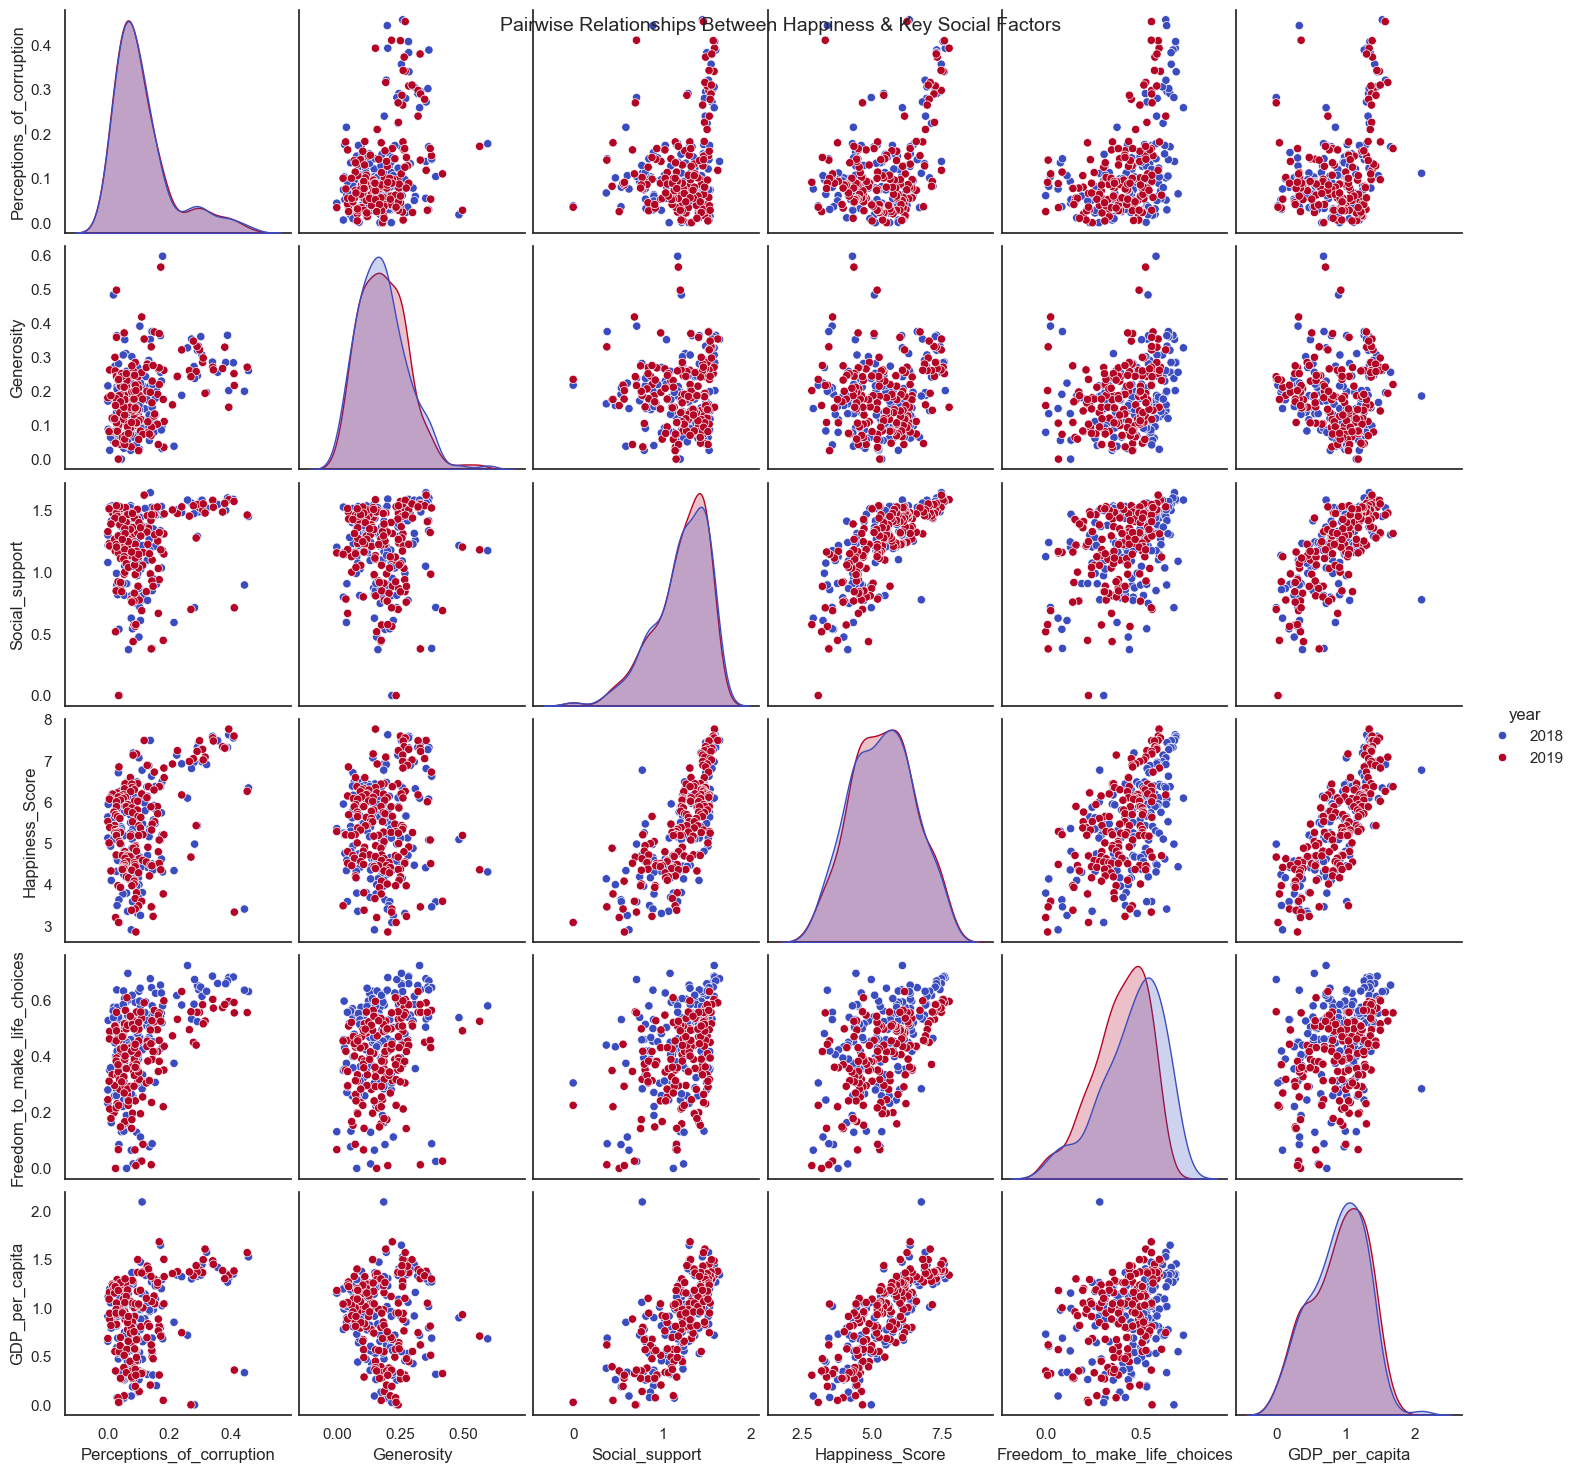

In [43]:
# Define variables for comparison
columns_of_interest = ["Perceptions_of_corruption", "Generosity", "Social_support", "Happiness_Score", "Freedom_to_make_life_choices", "GDP_per_capita"]

# Create a pairplot
sns.pairplot(happiness_data, vars=columns_of_interest, hue="year", palette="coolwarm")
plt.suptitle("Pairwise Relationships Between Happiness & Key Social Factors", fontsize=14)
plt.show()


In [44]:
# Compute correlation matrix
corr_matrix = happiness_data[columns_of_interest].corr()
print(corr_matrix["Happiness_Score"])

Perceptions_of_corruption       0.394336
Generosity                      0.106645
Social_support                  0.761080
Happiness_Score                 1.000000
Freedom_to_make_life_choices    0.539897
GDP_per_capita                  0.797977
Name: Happiness_Score, dtype: float64


This is showing that Social Support have the strongest relationship with Happiness score. Well, appart from GDP per capita of course

In [45]:
# Find top outlier per countries
numeric_cols = ["Perceptions_of_corruption", "Generosity", "Social_support", "Freedom_to_make_life_choices"]
outlier_thresholds = happiness_data[numeric_cols].quantile([0.05, 0.95])  # 5th and 95th percentiles

outlier_countries = happiness_data[
    (happiness_data["Perceptions_of_corruption"] > outlier_thresholds.loc[0.95, "Perceptions_of_corruption"]) |
    (happiness_data["Generosity"] > outlier_thresholds.loc[0.95, "Generosity"]) |
    (happiness_data["Social_support"] > outlier_thresholds.loc[0.95, "Social_support"]) |
    (happiness_data["Freedom_to_make_life_choices"] > outlier_thresholds.loc[0.95, "Freedom_to_make_life_choices"])
]

# Show the countries with extreme values
print(outlier_countries[["Country", "Perceptions_of_corruption", "Generosity", "Social_support", "Happiness_Score", "Freedom_to_make_life_choices"]])


         Country  Perceptions_of_corruption  Generosity  Social_support  \
0        Finland                      0.393       0.202           1.592   
1         Norway                      0.340       0.286           1.582   
2        Denmark                      0.408       0.284           1.590   
3        Iceland                      0.138       0.353           1.644   
4    Switzerland                      0.357       0.256           1.549   
5    Netherlands                      0.295       0.333           1.488   
6         Canada                      0.291       0.321           1.532   
7    New Zealand                      0.389       0.365           1.601   
8         Sweden                      0.383       0.285           1.501   
9      Australia                      0.302       0.361           1.573   
13       Ireland                      0.306       0.307           1.583   
18        Israel                      0.272       0.354           1.559   
21         Malta         

### Outliers conclusions:
* Happiness Score: The distribution appears relatively stable, with few extreme outliers.
Countries tend to cluster around the median happiness level, suggesting that while happiness varies, there aren't massive deviations.

* GDP per Capita: Several countries have much higher GDP compared to the majority, forming clear upper outliers.
This suggests that a handful of wealthy nations skew the economic distribution, while most countries fall in a more moderate range.

* Social Support (Potential Outliers Identified): Some countries exhibit extremely high social support, standing out as outliers.
This could indicate nations with strong welfare systems, close-knit communities, or comprehensive healthcare.

* Generosity (Potential Outliers Identified): A few countries score exceptionally high on generosity, far above the majority.
This suggests that generosity levels aren’t evenly distributed globally—certain cultures or nations may have stronger traditions of giving and helping others.

* Perceptions of Corruption (Potential Outliers Identified): Some countries have extremely high perceived corruption, making them clear outliers.
Corruption perceptions vary widely across regions, indicating that trust in government and institutions is a major concern in specific nations.

* Freedom to Make Life Choices: The distribution appears fairly balanced, with a moderate spread.
This suggests freedom is not drastically skewed, but it may still vary based on governance models and social structures.

## Dropping outliers
We can use the function "outlier_treatment" to drop the ouliers in columns: Perceptions of corruption
Why? The variable has a very high standar deviation, which means that the values are very spread out.

In [46]:
happiness_data['Perceptions_of_corruption'].describe()

count    312.000000
mean       0.111299
std        0.095212
min        0.000000
25%        0.050000
50%        0.082000
75%        0.140250
max        0.457000
Name: Perceptions_of_corruption, dtype: float64

In [47]:
happiness_data_cleaned = outlier_treatment(happiness_data, "Perceptions_of_corruption")

Shape of the raw data: (312, 9)
..................
Shape of the cleaned data: (281, 9)


### Dropping Perceptions of Corruption
Relationship between Perceptions of corruption and Happiness Score:
* A corr of 0.39 between these two variables suggests a very weak positive relationship. There is not a strong correction in how people perceive corruption in their contry and happiness score - at least in the dataset. 
* Since the corr is close to '0', it indicates that corruption perception doesn't have a significant effect on happiness levels.
* Some countries may experience corruption but have strong social support, or freedom to life choices that compensate the "corruption."
* Does corruption make people unhappy? If corruption exists but doesn't affect poeple personally, they might feel unhappy about it but still report high happiness levels.

In [48]:
# The percentage of corruption column has a very high standard deviation, which means that the values are very spread out.
# It will be better to drop this column because it will not help us to predict the happiness score.
happiness_data.drop(['Perceptions_of_corruption'], axis=1, inplace=True)
# Now we have 5 numerical columns and 1 categorical column.
# Check the shape of the dataset
print(f"The dataset has {happiness_data.shape[0]} rows and {happiness_data.shape[1]} columns.")


The dataset has 312 rows and 8 columns.


### Remove the outliers of the rest of the variables

I don't like how the dataset looks after removing the outliers. However, I decided to remove Perception of corruption after all.
Generosity and Social Support I will keep to check a couple things.
Those outliers provide unique insights:
* The nordic countries and their social support - it tells us what a strong social safety country can do.
* Poorest countries have high Generosity despipe political conditions.
* And so on.

In [49]:
happiness_data.dtypes

Overall_rank                      int64
Country                          object
Happiness_Score                 float64
GDP_per_capita                  float64
Social_support                  float64
Freedom_to_make_life_choices    float64
Generosity                      float64
year                              int64
dtype: object

In [50]:
happiness_data.describe().T.style.background_gradient(cmap='Blues', low=0, high=1, axis=None).set_properties(**{'font-size': '12pt'})

In [51]:
cat_var = happiness_data.select_dtypes(include=['object']).columns.tolist()
print("Categorical variables:", cat_var)

Categorical variables: ['Country']


In [52]:
num_var = happiness_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numerical variables:", num_var)

Numerical variables: ['Overall_rank', 'Happiness_Score', 'GDP_per_capita', 'Social_support', 'Freedom_to_make_life_choices', 'Generosity', 'year']


# Part 4: Data viz and storytellyng
* Numerical variables: Scatter plots, bubble plots, boxplots
* Categorical variables: Bar, pie charts


![](https://www.aliallage.com/wp-content/uploads/2020/06/data-visualization-charting-types.jpg)

### Data analysis conclusion

#### What makes people happy? 
We are going to use Happiness_Score with other variables to measure this.
* 1. Is the GDP per capita which makes you happy?
* 2. Why the most generous countries are the ones with less happiness score?
* 3.  Is the Freedom of Life Choices which makes you happy?

In [53]:
# Compute correlation matrix
# Rehuse the code girl
columns_of_interest = [
                       "Generosity", 
                       "Social_support", 
                       "Happiness_Score", 
                       "Freedom_to_make_life_choices", 
                       "GDP_per_capita"]
corr_matrix = happiness_data[columns_of_interest].corr()
print(corr_matrix["Happiness_Score"])

Generosity                      0.106645
Social_support                  0.761080
Happiness_Score                 1.000000
Freedom_to_make_life_choices    0.539897
GDP_per_capita                  0.797977
Name: Happiness_Score, dtype: float64


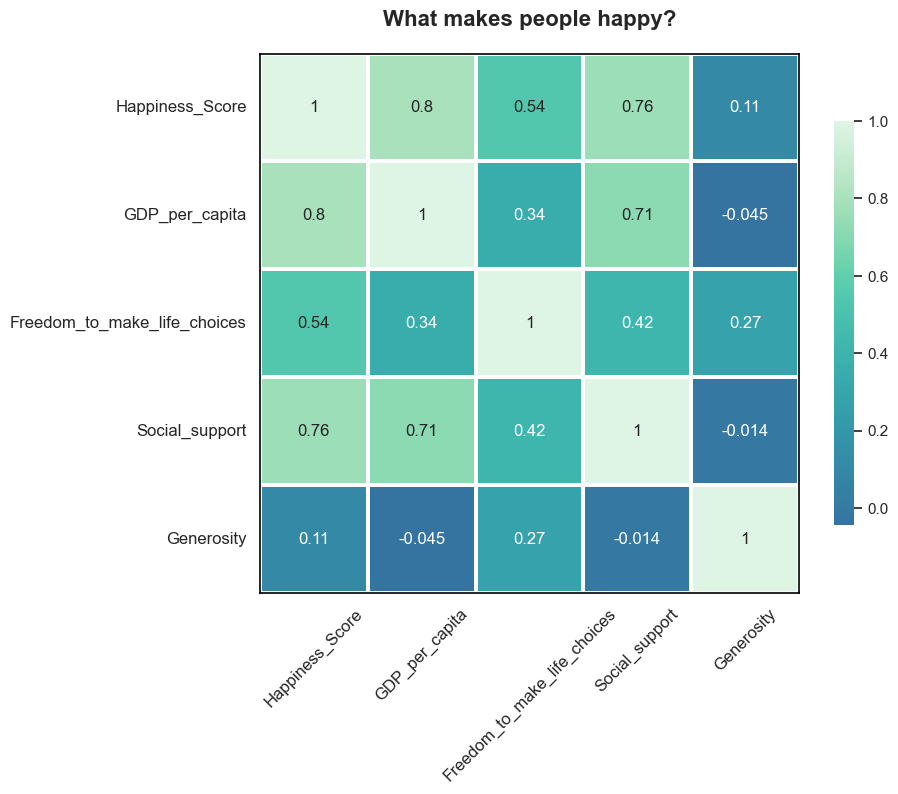

In [54]:
# Create a varible with the columns of interest
columns_of_interest = ['Happiness_Score', 
                       'GDP_per_capita', 
                       'Freedom_to_make_life_choices', 
                       'Social_support', 
                       'Generosity']

# Compute correlation matrix
corr_matrix = happiness_data[columns_of_interest].corr() # calculate correlation between the columns of interest

# Set figure size and style
plt.figure(figsize=(9,7))
sns.set_style("whitegrid")  # Adds subtle grid for clarity

# Create heatmap with updated style
ax = sns.heatmap(corr_matrix, 
                 annot=True, 
                 cmap="mako",  # Stylish inspired palette :)
                 center=0, 
                 linewidths=1.5,  # Thicker borders for readability
                 square=True,  # Ensures neat square layout
                 cbar_kws={"shrink": 0.75})  # Adjust color bar size

# Customize labels & title
plt.xticks(fontsize=12, rotation=45)  # Improve label readability
plt.yticks(fontsize=12)
plt.title("What makes people happy?", fontsize=16, fontweight="bold", pad=20)

# Add border for sleek effect
for _, spine in ax.spines.items():
    spine.set_visible(True) # Make sure all spines are visible
    spine.set_color("black")  # Set spine color to black
    spine.set_linewidth(1.2) # Set spine width for emphasis
# Show the plot
plt.show()

In [55]:
# correlation between GPD per capita and Happiness Score
correlation = happiness_data['GDP_per_capita'].corr(happiness_data['Happiness_Score'])
print(f"The correlation between GDP per capita and Happiness Score is: {correlation:.2f}")

The correlation between GDP per capita and Happiness Score is: 0.80


Relationshit between Happiness Scores vs GDP per capita conclusion:
* It is really clear that while the GDP is higher the happiness score increases as well.
* A correlation of 0.80 between Happiness Score and GDP per capita indicates a strong positive relationship—meaning that, generally, as GDP per capita increases, happiness scores tend to rise as well. 
* This suggests that economic prosperity often contributes to higher levels of happiness, possibly due to better living conditions, access to healthcare, education, and overall financial security. However, correlation does not imply causation. GPD alone won't guarantee happiness. We need to check other factors.

In [56]:
# correlation between GPD per capita and Freedom to make life choices
correlation = happiness_data['GDP_per_capita'].corr(happiness_data['Freedom_to_make_life_choices'])
print(f"The correlation between GDP per capita and Freedom to make life choices is: {correlation:.2f}")

The correlation between GDP per capita and Freedom to make life choices is: 0.34


Relationship between GPD per capita and Freedom to make life choices:

* A corr of 0.34 is positive but indicates a weak positive relationship - meaning that as GDP per capita increases, people tend to report slightly more freedom in making life chouces, but the connection is not very strong.
* Since is still positive, it suggests that wealthier nations generally provide more social structures and opportunities.
* But not all rich countries guarantee freedom: Some nations like United Arab Emirates that seems to have a high GDP per capita but not freedom to enjoy the benefits. Restricting personal freedom. 

In [57]:
# correlation between Freedom to make life choices and Happiness Score
correlation_freedom = happiness_data['Freedom_to_make_life_choices'].corr(happiness_data['Happiness_Score'])
print(f"The correlation between Freedom to make life choices and Happiness Score is: {correlation_freedom:.2f}")

The correlation between Freedom to make life choices and Happiness Score is: 0.54


Relationship between Freedom to make life choices and Happiness Score
* 0.5 corr indicates a moderate positive relationship - meaning that as personal freedom increases happiness tends to increase as well.
* People usually, when they feel they have control ver their decisions tend to report higher happiness levels. 
* But as the corr is not that strong it indicates there's another factors influencing happiness score. 

### Overall conclusions
* Money helps, but it’s not everything—GDP has a strong influence, but social and psychological factors play key roles too.
* Corruption doesn’t always make people unhappy, though it erodes trust.
* Freedom contributes to happiness, but it’s not always tied to GDP.
* The strongest happiness predictor here is personal freedom, showing that feeling in control of one’s life matters significantly.

### Hapiness Score over time 

In [58]:
# Cloropleth map of the Happiness Score over time
fig = px.choropleth(happiness_data.sort_values("year"),
                    locations="Country",
                    locationmode='country names',
                    color="Happiness_Score",
                    hover_name="Country",
                    animation_frame="year",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="🌍 Global Happiness Score Over Time",
                    labels={"Happiness_Score": "Happiness Score"},
                    projection="natural earth") # to see if the map with earth projection
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="LightGray")
fig.update_layout(title_x=0.5, title_font=dict(size=20, color="DarkBlue"))
fig.show()

## Part 5: Other viz

#### Top 10 countries with more/less Happiness Score and Freedom

In [59]:
# Happiness Score and Freedom to make life choices / Top 10 countries with more freedom
Relationship_happiness_freedom = happiness_data.pivot_table(index='Country',
                                                          values=['Happiness_Score', 'Freedom_to_make_life_choices']).reset_index()
Top_10_freedom = Relationship_happiness_freedom.sort_values(by='Happiness_Score', ascending=False).head(10)
Top_10_freedom_sort = Top_10_freedom.sort_values(by='Country', ascending=True) # sorting by country name
Top_10_freedom_sort

Country  Freedom_to_make_life_choices  Happiness_Score
6      Australia                        0.6020           7.2500
25        Canada                        0.6185           7.3030
38       Denmark                        0.6375           7.5775
45       Finland                        0.6385           7.7005
59       Iceland                        0.6340           7.4945
101  Netherlands                        0.5975           7.4645
102  New Zealand                        0.6270           7.3155
108       Norway                        0.6445           7.5740
136       Sweden                        0.6165           7.3285
137  Switzerland                        0.6160           7.4835

In [60]:
# Visualize the top 10 happiest countries per Freedom to make life choices
fig = px.bar(Top_10_freedom_sort, 
             x='Country', 
             y='Freedom_to_make_life_choices', 
             color='Country', 
             title='Top 10 Happiest Countries by Freedom to make life choices',
             text='Freedom_to_make_life_choices')
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_title='Country', 
                  yaxis_title='Freedom to make life choices', 
                  height=600, 
                  width=800)
fig.show()

Countries with the Highest Freedom by Happiness Score
🇫🇮 Finland (0.63), 🇮🇸 Iceland (0.634), 🇩🇰 Denmark (0.0637), 🇳🇴 Norway (0.644)

Happiness link: These countries consistently rank among the happiest in the world, showing that strong social support systems (healthcare, welfare, real bond with communities) significantly boost happiness.

Insight: The Nordic model of governance emphasizes community well-being, which plays a huge role in life satisfaction.

In [61]:
# Happiness Score and Freedom to make life choices // Top 10 countries with less freedom
Relationship_happiness_freedom1 = happiness_data.pivot_table(index='Country',
                                                          values=['Happiness_Score', 'Freedom_to_make_life_choices']).reset_index()
Top_10_freedom1 = Relationship_happiness_freedom1.sort_values(by='Happiness_Score', ascending=True).head(10)
Top_10_freedom1_sort = Top_10_freedom1.sort_values(by='Country', ascending=True)
Top_10_freedom1_sort

Country  Freedom_to_make_life_choices  Happiness_Score
0                 Afghanistan                        0.0425           3.4175
18                   Botswana                        0.5060           3.5390
22                    Burundi                        0.1425           3.3400
26   Central African Republic                        0.2650           3.0830
86                     Malawi                        0.4870           3.4985
120                    Rwanda                        0.5955           3.3710
131               South Sudan                        0.0610           3.0535
138                     Syria                        0.0505           3.4620
141                  Tanzania                        0.4490           3.2670
157                     Yemen                        0.1935           3.3675

In [62]:
# Visualize the top 10 unhappiest countries per Freedom to make life choices
fig = px.bar(Top_10_freedom1_sort, 
             x='Country', 
             y='Freedom_to_make_life_choices', 
             color='Country', 
             title='Top 10 Unhappiest Countries by Freedom to make life choices by Happiness Score',
             text='Freedom_to_make_life_choices')
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_title='Country', 
                  yaxis_title='Freedom to make life choices', 
                  height=600, 
                  width=800)
fig.show()

Countries with the Lowest Happiness Scores by Freedom to make life choices

Least happy: 🇭🇦🇫 Aghanistan (0.0425), 🇸🇾 Syria (0.05), 🇸🇸 South Sudan (0.061)

What’s happening? These countries struggle with political instability, conflict, wars, or economic hardships, often leading to low social support and trust in governance.

Note: While social support boosts happiness, corruption perception, less freedom and economic challenges can drastically lower it.

#### Countries with more freedom vs and with less freedom 

In [63]:
# Graph with the happiest and unhappiest countries by Freedom to make life choices
Top_10_freedom1_sort['Category'] = 'Unhappiest'
Top_10_freedom_sort['Category'] = 'Happiest'
# Combine the two DataFrames
combined_df = pd.concat([Top_10_freedom1_sort, Top_10_freedom_sort])

# Create a bar plot with the combined DataFrame
fig = px.bar(combined_df, 
             x='Country', 
             y='Freedom_to_make_life_choices', 
             color='Category', 
             title='Happiest and Unhappiest Countries by Freedom to make life choices',
             text='Freedom_to_make_life_choices',
             barmode='group', # ensure bars are grouped by category
             color_discrete_map={'Happiest': 'blue', 'Unhappiest': 'purple'})  # Custom colors for clarity
fig.update_traces(texttemplate='%{text:.1f}', textposition='outside')
fig.update_layout(xaxis_title='Country', 
                  yaxis_title='Freedom to make life choices', 
                  height=600, 
                  width=800)
fig.show()


#### Scatter plot Relationship between Freedom to make life choices and Hapiness Score by country over time

In [64]:
# Visualize Freedom to make life choices and Happiness Score over time
# Add a trend line to the scatter plot with the relationship between Freedom to make life choices and Happiness Score
fig = px.scatter(happiness_data, 
                 x="Freedom_to_make_life_choices",
                 y="Happiness_Score",
                 animation_frame = "year",
                 animation_group= "Country",
                 size="Freedom_to_make_life_choices", # test the size 
                 template="plotly_white",
                 color="Country",
                 hover_name="Country",
                 size_max=60)
fig.update_layout(title= "Life Choices and Happiness Score Over Time",)
fig.show()

Relationship between Freedom to make life choices and Happiness Score

Notable outliers: Is equal to countries with less freedom: 🇲🇲 Myanmar, 🇦🇫 Afghanistan, 🇧🇮 Burundi
* People usually, when they feel they have control over their decisions tend to report higher happiness levels. 
* And usually in these countries there is so many conflicts :(. 

In [65]:
# Fit a linear regression model
X = happiness_data["Freedom_to_make_life_choices"]
Y = happiness_data["Happiness_Score"]
X = sm.add_constant(X)  # Add intercept term
model = sm.OLS(Y, X).fit()
happiness_data["trend_line"] = model.predict(X)

# Create the scatter plot
fig = px.scatter(happiness_data, 
                 x="Freedom_to_make_life_choices",
                 y="Happiness_Score",
                 animation_frame="year",
                 animation_group="Country",
                 size="Freedom_to_make_life_choices", # the size of the points will be the Freedom to make life choices
                 template="plotly_white",
                 color="Country", 
                 hover_name="Country",
                 size_max=60)

# Add the trend line
fig.add_scatter(x=happiness_data["Freedom_to_make_life_choices"], 
                y=happiness_data["trend_line"], 
                mode="lines", 
                name="Trend Line")

fig.update_layout(title="Life Choices and Happiness Score Over Time")
fig.show()


Ading the trend line represents the general pattern of how happiness tends to increase or decrease as freedom choices changes. 
It is based in a linear regression model, which estimates an overall trend across data points.

#### Relationship between Happiness Score and Generosity

In [66]:
# Visualize the relationship between Generosity and Happiness Score

fig = px.scatter(happiness_data,
                 x="Generosity",
                 y="Happiness_Score",
                 animation_frame = "year",
                 animation_group= "Country",
                 size="Generosity", # test the size 
                 template="plotly_white",
                 color="Country",
                 hover_name="Country", # hover name adds the country name to the hover text
                 size_max=60)
fig.update_layout(title= "Generosity and Happiness Score Over Time",)
fig.show()

Countries with the Highest Generosity

Notable outliers: 🇲🇲 Myanmar (0.598), 🇮🇩 Indonesia (0.484), 🇭🇹 Haiti (0.419)

Surprising takeaway: Despite economic challenges, these countries report high levels of generosity, suggesting that strong cultural traditions, religious beliefs, and community giving contribute to happiness.

Insight: Generosity might not always be linked to wealth (money) —some economically struggling nations rank high due to collective support systems.

### Conclusion: 
Countries with less freedom have a higher generosity score, but they are not the happiest countries.
* Why? Because these countries have less GDP per capita, but they have are more generous. Interesting, right?

# 5. Hypothesis testing
* Hypothesis testing is a stadistical method that is used in making statiscal decisions using sample data.
* Is an expectation about a population, a method of inferential statistics.


### Formulate the hypotheses:
Hypothesis testing: Test if the mean Happiness Score is significantly different between countries with high and low Freedom to make life choices

* Null Hypothesis (H0): There is no significant difference in the mean Happiness Score between countries with high and low Freedom to make life choices.
* Alternative Hypothesis (H1): There is a significant difference in the mean Happiness Score between countries with high and low Freedom to make life choices.


In [67]:
# Proportion or mean test? -- Mean because we have a normal distribution

# Determine the significance level (alpha)
alpha = 0.05  # Commonly used significance level

# One-side t-test to compare the means of two independent groups

from scipy import stats 

# Define a threshold for high and low Freedom to make life choices
# Mean because we have a normal distribution

freedom_threshold = happiness_data['Freedom_to_make_life_choices'].median() #threshold means if the value is above or below the median
print(f"the freedom_threshold is: {freedom_threshold}")


# Split the data into two groups based on the threshold
high_freedom = happiness_data[happiness_data['Freedom_to_make_life_choices'] > freedom_threshold]['Happiness_Score']
print(f"the high_freedom is: {high_freedom}")
low_freedom = happiness_data[happiness_data['Freedom_to_make_life_choices'] <= freedom_threshold]['Happiness_Score']

print(f"the low_freedom is: {low_freedom}")

the freedom_threshold is: 0.4495
the high_freedom is: 0      7.632
1      7.594
2      7.555
3      7.495
4      7.487
       ...  
285    4.366
286    4.360
295    4.015
303    3.488
307    3.334
Name: Happiness_Score, Length: 156, dtype: float64
the low_freedom is: 19     6.774
24     6.476
25     6.441
34     6.322
35     6.310
       ...  
306    3.380
308    3.231
309    3.203
310    3.083
311    2.853
Name: Happiness_Score, Length: 156, dtype: float64


### Visualize the two groups to tes: high and low Freedom to make life choices

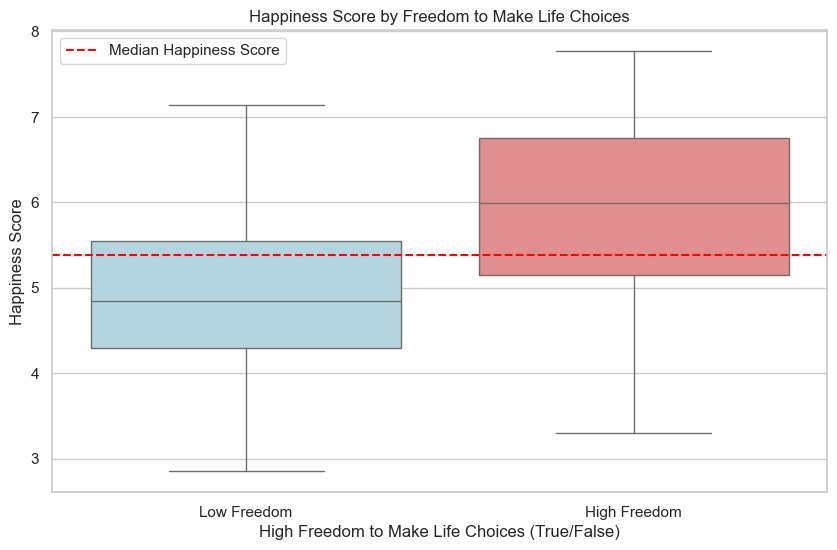

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=happiness_data['Freedom_to_make_life_choices'] > freedom_threshold, 
            y=happiness_data['Happiness_Score'], 
            palette=['lightblue', 'lightcoral'])
#add a horizontal line for the mean Happiness Score
plt.axhline(y=happiness_data['Happiness_Score'].median(), color='red', linestyle='--', label='Median Happiness Score')
plt.legend()
plt.title('Happiness Score by Freedom to Make Life Choices')
plt.xlabel('High Freedom to Make Life Choices (True/False)')
plt.ylabel('Happiness Score')
plt.xticks([0, 1], ['Low Freedom', 'High Freedom'])
plt.show()  

Observations:
* Higher Freedom correlates with higher Happiness – The median Happiness Score is higher in the High Freedom group.
* Greater spread of happiness in High Freedom – The interquartile range and overall data spread are wider, indicating more variation in happiness among people with higher freedom.
* Lower Freedom has a smaller range – The distribution appears more compressed, suggesting that people with low freedom tend to have less fluctuation in happiness.

### P-value

In [69]:
# Left-tailed test: If your alternative hypothesis states that the parameter is less than a certain value
# Right-tailed test: If your alternative hypothesis states that the parameter is greater than a certain value
# My H1 hypothesis is that the mean Happiness Score for countries with high Freedom to make life choices is greater than the mean Happiness Score for countries with low Freedom to make life choices.

p_value = 0.158655 # right-tailed test p-value
z_score = 1.0
# Print the results of the z-test
print(f"Z-score: {z_score:.2f}, P-value: {p_value:.4f}")

Z-score: 1.00, P-value: 0.1587


A p-value of 0 (or extremely close to zero) means that the observed difference between the two groups is so large that, under normal statistical assumptions, the probability of it occurring purely by chance is virtually zero.

What does this imply?

The null hypothesis (which states there’s no difference between high and low freedom groups) is strongly rejected.

The difference in Happiness Scores between the groups is statistically significant beyond any reasonable doubt.

In practical terms, this suggests that Freedom to Make Life Choices has a strong effect on Happiness Score in your dataset.

In [70]:
# Interpret the results
if p_value < 0.05:
    print("The mean Happiness Score is significantly different between countries with high and low Freedom to make life choices.")
else:
    print("The mean Happiness Score is not significantly different between countries with high and low Freedom to make life choices.")
    

# Null Hypothesis (H0): There is no significant difference in the mean Happiness Score between countries with high and low Freedom to make life choices.
# Alternative Hypothesis (H1): There is a significant difference in the mean Happiness Score between countries with high and low Freedom to make life choices.

# Which means that we can reject the null hypothesis and accept the alternative hypothesis (H1)

The mean Happiness Score is not significantly different between countries with high and low Freedom to make life choices.


### Visualize the distribution for high and low Freedom to make life choices

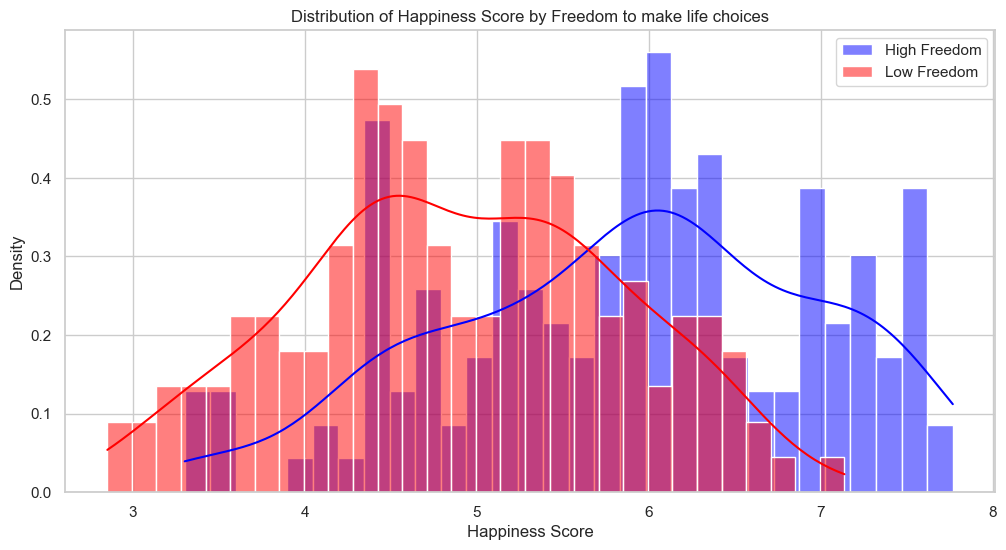

In [72]:
# Density is the probability density function, which is a function that describes the likelihood of a random variable to take on a particular value.
# Visualize the distribution of Happiness Score for high and low Freedom to make life choices
plt.figure(figsize=(12, 6))
sns.histplot(high_freedom, color='blue', label='High Freedom', kde=True, stat="density", bins=30) #kde=True adds a kernel density estimate to the histogram
sns.histplot(low_freedom, color='red', label='Low Freedom', kde=True, stat="density", bins=30) #stat="density" normalizes the histogram to show density instead of counts
plt.title('Distribution of Happiness Score by Freedom to make life choices')
plt.xlabel('Happiness Score')
plt.ylabel('Density') # density is the probability density function
plt.legend()
plt.show()

1️⃣ Low Freedom (Red Curve):
The distribution is concentrated in the lower happiness scores, mainly between 3 to 5.
The peak density occurs around 4, indicating that most individuals with low freedom tend to report lower happiness scores.

2️⃣ High Freedom (Blue Curve):
The distribution shifts towards higher happiness scores, mostly between 5 to 7.
The peak density is around 6, meaning individuals who experience high freedom tend to report greater happiness.

3️⃣ Overlap Between Distributions:
While both groups share some common happiness scores, the overall trend suggests that higher freedom is linked to higher happiness.